<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Metadata-summary" data-toc-modified-id="Metadata-summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata summary</a></span><ul class="toc-item"><li><span><a href="#Intra-sample-metadata-variation?" data-toc-modified-id="Intra-sample-metadata-variation?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Intra-sample metadata variation?</a></span></li><li><span><a href="#Metadata-explore" data-toc-modified-id="Metadata-explore-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Metadata explore</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Aggregating-samples" data-toc-modified-id="Aggregating-samples-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Aggregating samples</a></span></li><li><span><a href="#Formatting" data-toc-modified-id="Formatting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Formatting</a></span></li></ul></li><li><span><a href="#Writing-tables" data-toc-modified-id="Writing-tables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Writing tables</a></span><ul class="toc-item"><li><span><a href="#All-metadata" data-toc-modified-id="All-metadata-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>All metadata</a></span></li><li><span><a href="#Filtered-metadata" data-toc-modified-id="Filtered-metadata-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Filtered metadata</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* summarize the metadata for all samples

# Var

In [1]:
# base directory
base_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
# output directory
out_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'
# metadata
metadata_file = file.path(base_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat.tsv')
# samples
sample_file_dir = file.path(base_dir, 'CurMetDat-metagenomes', 'files', 'sample_files')

# params
threads = 16

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt




In [3]:
df.dims()
setDTthreads(threads)

# Load

In [4]:
meta = Fread(metadata_file)
meta %>% unique_n('Samples', sampleID)
meta

No. of unique Samples: 3594 


dataset_name,sampleID,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,fgf_19,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZellerG_2014,CCIS82944710ST-20-0,FR-730,stool,NA,control,healthy,38,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
ZellerG_2014,CCIS93040568ST-20-0,FR-682,stool,NA,control,healthy,65,adult,male,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1


In [5]:
# listing sample files
sample_files = list_files(sample_file_dir, '*.txt')
sample_files %>% length
sample_files %>% head

[1] 33

[1] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/01_CosteaPI_2017_samplefile.txt"      
[2] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/02_Obregon-TitoAJ_2015_samplefile.txt"
[3] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/03_PasolliE_2018_samplefile.txt"      
[4] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/04_BritoIL_2016_samplefile.txt"       
[5] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/05_PehrssonE_2016_samplefile.txt"     
[6] "/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/sample_files/06_TettAJ_2019_a_samplefile.txt"

In [6]:
# loading sample files
samples = sample_files %>% 
    files_to_list(0) %>%
    lapply(Fread) %>%
    data.table::rbindlist(use.names=TRUE, idcol='dataset') %>%
    dt_mutate(dataset = gsub('^[0-9]+_(.+)_samplefile.txt', '\\1', dataset))

samples %>% unique_n('Samples', Sample)
samples

No. of unique Samples: 3416 


dataset,Sample,Run,Lane,Remote
<chr>,<chr>,<int>,<int>,<chr>
CosteaPI_2017,halbarad-11-0-0,1325,1,ERR1728659
CosteaPI_2017,halbarad-11-0-0,1326,1,ERR1728658
⋮,⋮,⋮,⋮,⋮
YuJ_2015,SZAXPI017591-140,5493,1,ERR1018308
YuJ_2015,SZAXPI017592-142,5494,1,ERR1018309


In [7]:
# checking key overlap
overlap(samples, meta, Sample, sampleID)
cat('---\n')
overlap(samples, meta, dataset, dataset_name)

intersect(x,y): 3416 
setdiff(x,y): 0 
setdiff(y,x): 178 
union(x,y): 3594 
---
intersect(x,y): 33 
setdiff(x,y): 0 
setdiff(y,x): 4 
union(x,y): 37 


In [8]:
# joining samples + metadata
samples = samples %>%
    dt_inner_join(meta %>% dt_rename('Sample'=sampleID, 'dataset'=dataset_name), 
                  by=c('Sample', 'dataset'))

samples %>% unique_n('Samples', Sample)
samples

No. of unique Samples: 3416 


dataset,Sample,Run,Lane,Remote,subjectID,body_site,antibiotics_current_use,study_condition,disease,⋯,fgf_19,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
AsnicarF_2017,MV_FEM1_t1Q14,2386,1,SRR4052043,MV_FEM1,stool,NA,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
AsnicarF_2017,MV_FEM2_t1Q14,2387,1,SRR4052044,MV_FEM2,stool,NA,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,3724,1,ERR1110329,PNP_Validation_45,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
ZeeviD_2015,PNP_Validation_46,3725,1,ERR1110330,PNP_Validation_46,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1


# Metadata summary

In [9]:
# seqs per sample
samples %>% dt_pull(number_reads) %>% summary_x('No. of reads')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of reads,1060,32175635,70955428,74888934,107103870,356009214,127579987,52084311


In [10]:
samples %>% dt_filter(number_reads >= 5e5) %>%
    unique_n('Samples', Sample)

No. of unique Samples: 3404 


In [11]:
samples %>% dt_filter(number_reads >= 5e5) %>%
    unique_n('Subjects', subjectID)

No. of unique Subjects: 3011 


## Intra-sample metadata variation?

In [9]:
# number of samples
samples %>% unique_n('Samples', Sample)

# number of unique records
samples %>%
    dt_distinct(Sample, body_site, study_condition, age, BMI, 
             gender, country, non_westernized, sequencing_platform) %>%
    unique_n('Samples+', Sample)

No. of unique Samples: 73 
No. of unique Samples+: 9 


## Metadata explore

In [10]:
samples %>% colnames

[1] "dataset"                            "Sample"                            
 [3] "Run"                                "Lane"                              
 [5] "Remote"                             "subjectID"                         
 [7] "body_site"                          "antibiotics_current_use"           
 [9] "study_condition"                    "disease"                           
[11] "age"                                "age_category"                      
[13] "gender"                             "country"                           
[15] "non_westernized"                    "sequencing_platform"               
[17] "DNA_extraction_kit"                 "PMID"                              
[19] "number_reads"                       "number_bases"                      
[21] "minimum_read_length"                "median_read_length"                
[23] "pregnant"                           "lactating"                         
[25] "NCBI_accession"                     "BMI"                               
[27] "antibiotics_family"                 "alcohol"                           
[29] "disease_subtype"                    "hdl"                               
[31] "triglycerides"                      "hba1c"                             
[33] "ldl"                                "body_subsite"                      
[35] "days_from_first_collection"         "family"                            
[37] "cholesterol"                        "glucose"                           
[39] "mumps"                              "adiponectin"                       
[41] "hscrp"                              "leptin"                            
[43] "glutamate_decarboxylase_2_antibody" "creatinine"                        
[45] "cd163"                              "protein_intake"                    
[47] "days_after_onset"                   "stec_count"                        
[49] "shigatoxin_2_elisa"                 "stool_texture"                     
[51] "location"                           "dyastolic_p"                       
[53] "systolic_p"                         "creatine"                          
[55] "albumine"                           "bilubirin"                         
[57] "smoker"                             "ever_smoker"                       
[59] "birth_control_pil"                  "fobt"                              
[61] "curator"                            "c_peptide"                         
[63] "insulin_cat"                        "fgf_19"                            
[65] "il_1"                               "glp_1"                             
[67] "travel_destination"                 "urea_nitrogen"                     
[69] "disease_stage"                      "uncurated_metadata"                
[71] "family_member"                      "subject_n"                         
[73] "samp_n"

In [11]:
samples %>%
    dt_select(body_site, antibiotics_current_use, study_condition, disease, 
                 age, gender, country, non_westernized, sequencing_platform, number_reads) %>%
    as_tibble %>%
    summary

  body_site         antibiotics_current_use study_condition   
 Length:6891        Length:6891             Length:6891       
 Class :character   Class :character        Class :character  
 Mode  :character   Mode  :character        Mode  :character  
                                                              
                                                              
                                                              
                                                              
   disease               age            gender            country         
 Length:6891        Min.   : 19.00   Length:6891        Length:6891       
 Class :character   1st Qu.: 25.00   Class :character   Class :character  
 Mode  :character   Median : 35.00   Mode  :character   Mode  :character  
                    Mean   : 39.53                                        
                    3rd Qu.: 53.00                                        
                    Max.   :107.00            

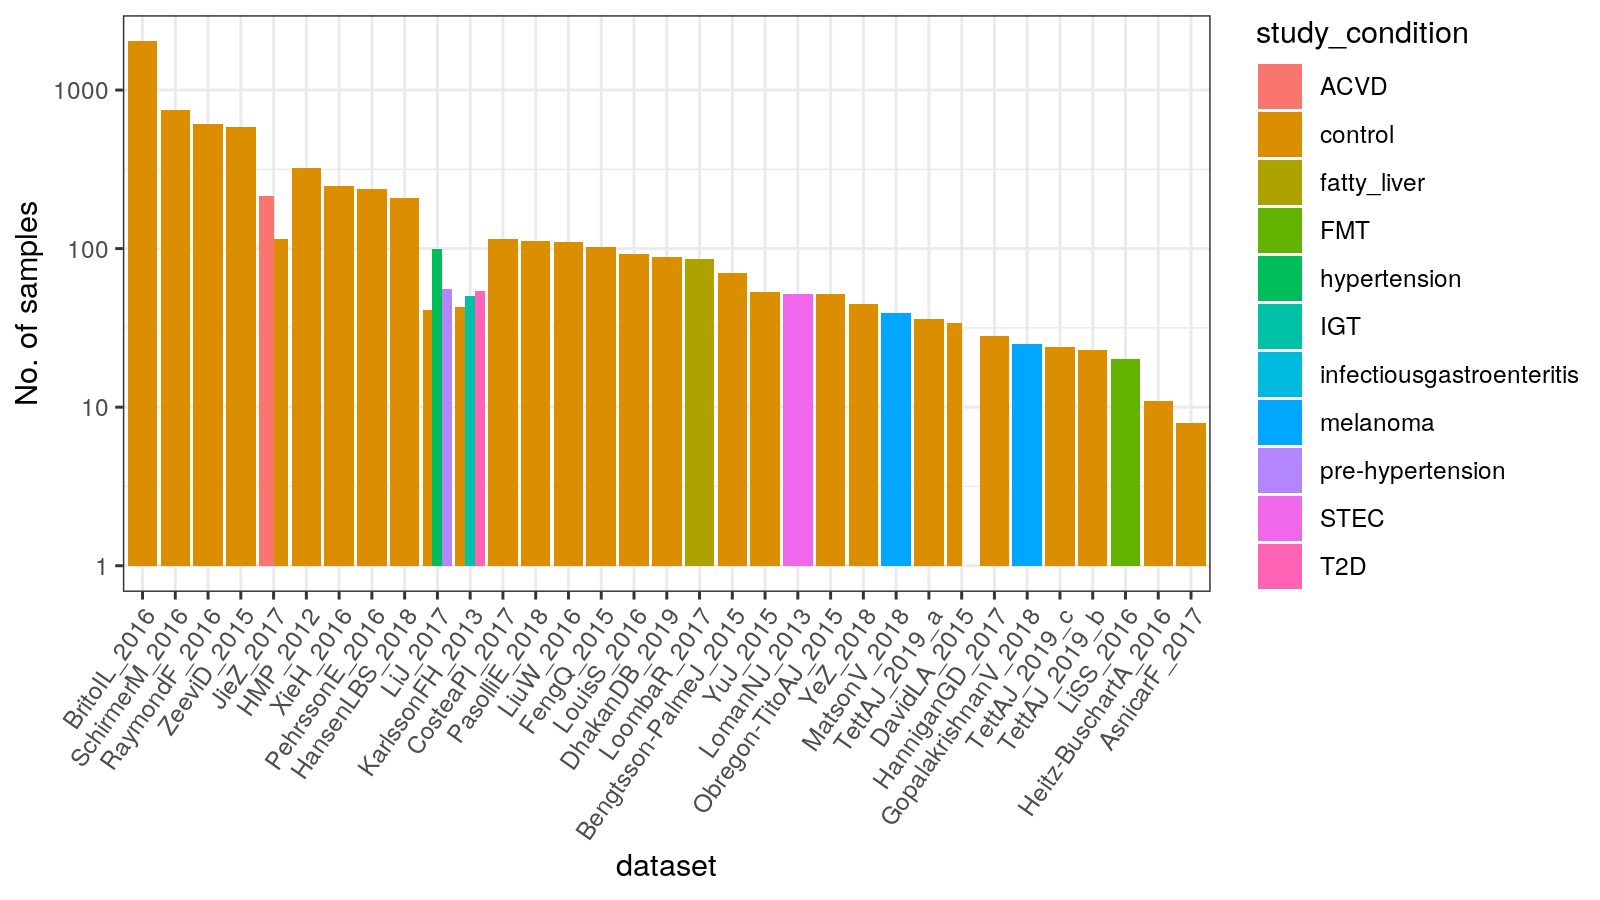

In [24]:
# study condition
p = samples %>%
    dt_mutate(n_samples = length(study_condition), by=list(dataset)) %>%
    dt_count(study_condition, by=list(dataset, n_samples)) %>%
    dt_mutate(dataset = reorder(dataset, -n_samples)) %>%
    ggplot(aes(dataset, N, fill=study_condition)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y='No. of samples') +
    theme_bw() +
    theme(
       axis.text.x = element_text(angle=55, hjust=1) 
    )

p.dims(8,4.5)
plot(p)

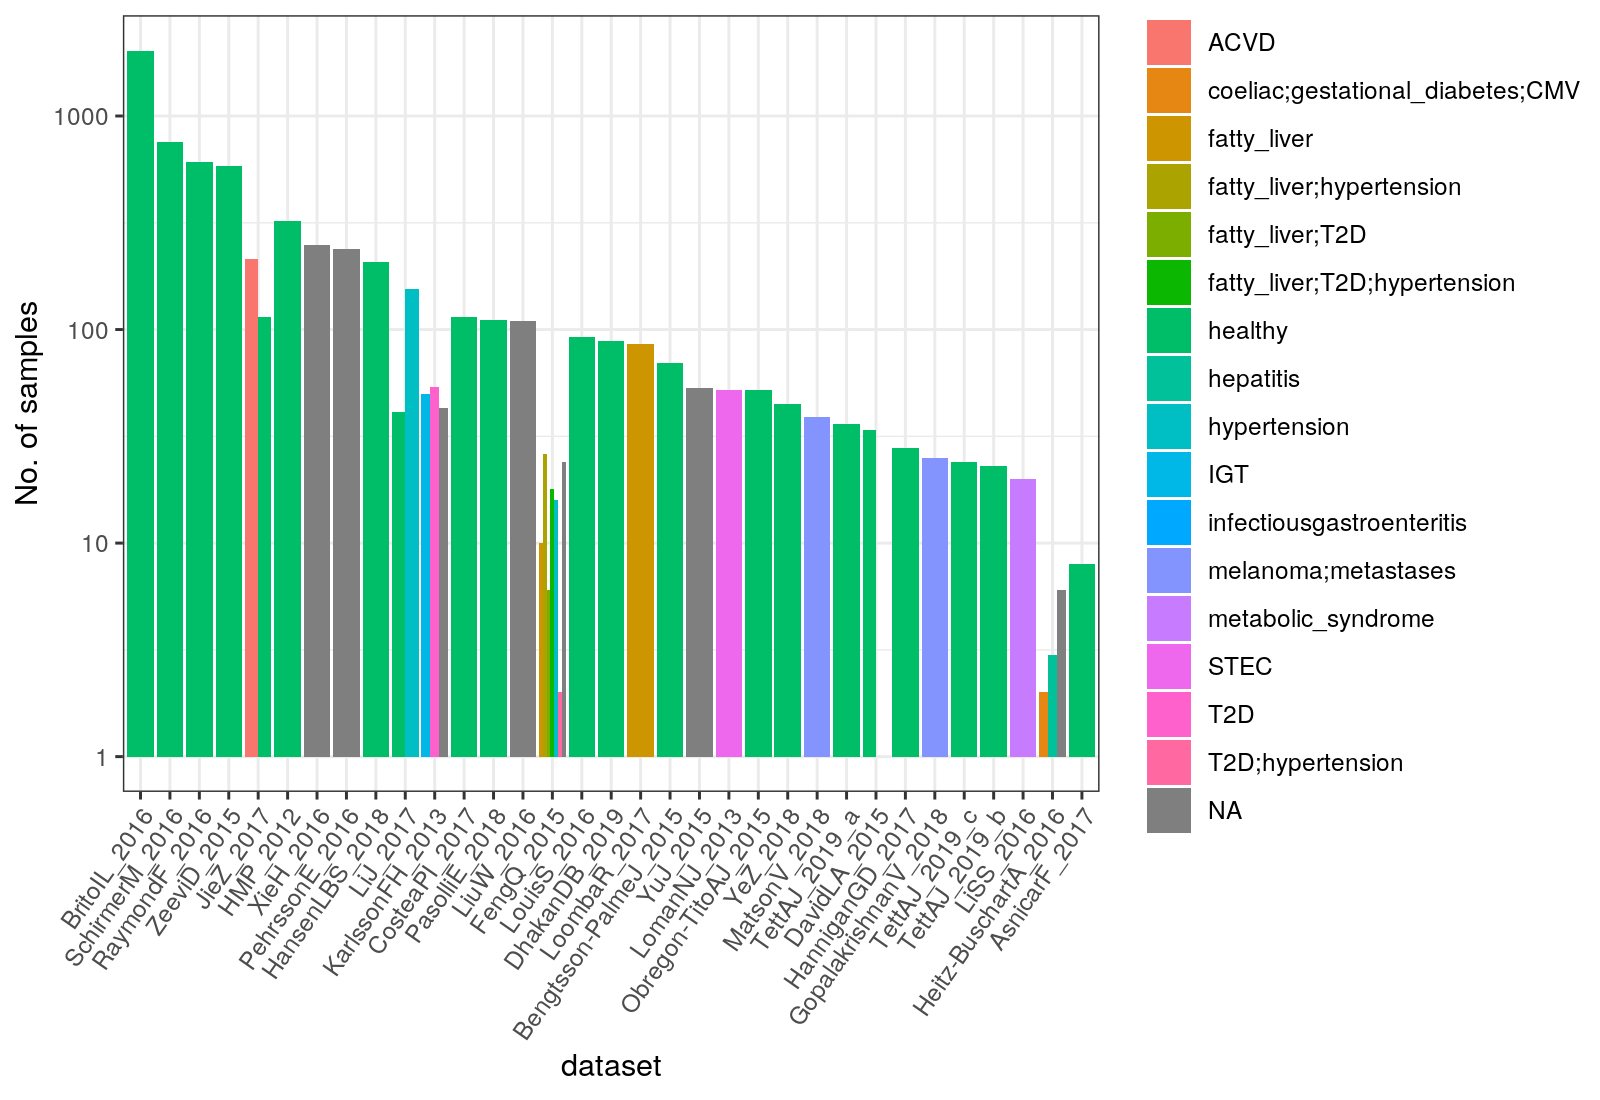

In [26]:
# disease
p = samples %>%
    dt_mutate(n_samples = length(disease), by=list(dataset)) %>%
    dt_count(disease, by=list(dataset, n_samples)) %>%
    dt_mutate(dataset = reorder(dataset, -n_samples)) %>%
    ggplot(aes(dataset, N, fill=disease)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y='No. of samples') +
    theme_bw() +
    theme(
       axis.text.x = element_text(angle=55, hjust=1) 
    )

p.dims(8,5.5)
plot(p)

## Filtering

In [37]:
# initial filtering
samples_f = samples %>%
    dt_filter(!is.na(body_site), 
              !is.na(study_condition),
              !is.na(age),
              !is.na(gender),
              !is.na(country),
              !is.na(non_westernized),
              !is.na(sequencing_platform),
              number_reads >= 1e6)

samples_f

dataset,Sample,Run,Lane,Remote,subjectID,body_site,antibiotics_current_use,study_condition,disease,⋯,fgf_19,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,1,1,ERR636349,TRAVELRES1_2,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
Bengtsson-PalmeJ_2015,TRAVELRES10,1,1,ERR636358,TRAVELRES9_10,stool,no,control,healthy,⋯,NA,NA,NA,LKA,NA,NA,NA,NA,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N-38,1,1,SRR8675918,YEZ_N-38,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1
YeZ_2018,YEZ_N-37,1,1,SRR8675921,YEZ_N-37,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,1


In [38]:
# datasets
samples_f %>% unique_n('Datasets', dataset)
samples_f %>% dt_pull(dataset) %>% table

No. of unique Datasets: 17 


.
Bengtsson-PalmeJ_2015          BritoIL_2016         CosteaPI_2017 
                   70                  2026                   108 
        DhakanDB_2019            FengQ_2015        HansenLBS_2018 
                   88                   102                    25 
 Heitz-BuschartA_2016              HMP_2012             JieZ_2017 
                   11                   321                   206 
      KarlssonFH_2013   Obregon-TitoAJ_2015         PasolliE_2018 
                  147                    52                    96 
       PehrssonE_2016         RaymondF_2016        SchirmerM_2016 
                  238                   612                   753 
            XieH_2016              YeZ_2018 
                  250                    45 

## Aggregating samples

In [39]:
samples_f_s = samples_f %>%
    dt_mutate(number_reads = number_reads %>% as.Num %>% sum, 
              number_bases = number_bases %>% as.Num %>% sum,
              minimum_read_length = minimum_read_length %>% as.Num %>% min,
              median_read_length = median_read_length %>% as.Num %>% mean, 
              by=list(Sample, body_site, study_condition, age, 
                   gender, country, non_westernized, sequencing_platform)) %>%
    dt_select(-Run, -Lane, -Remote) %>%
    dt_distinct(Sample, body_site, study_condition, age, BMI,
                gender, country, non_westernized, sequencing_platform, dataset)


Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 71 column 'number_reads': 2400320426.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 72 column 'number_reads': 2451685292.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 76 column 'number_reads': 2346384024.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 77 column 'number_reads': 2442535804.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group

Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 1133 column 'number_reads': 3163371080.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 1135 column 'number_reads': 3177808320.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 1138 column 'number_reads': 2178894318.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% :
“Group 1139 column 'number_reads': 6082215272.000000 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer'”
Warning message in `[.data.table`(.data, , `:=`(number_reads = number_reads %>% 

In [40]:
samples_f_s %>% unique_n('Samples', Sample)
samples_f_s

No. of unique Samples: 1846 


Sample,body_site,study_condition,age,BMI,gender,country,non_westernized,sequencing_platform,dataset
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
TRAVELRES1,stool,control,25,NA,female,SWE,no,IlluminaHiSeq,Bengtsson-PalmeJ_2015
TRAVELRES10,stool,control,34,NA,female,SWE,no,IlluminaHiSeq,Bengtsson-PalmeJ_2015
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YEZ_N-38,stool,control,38,19.7,female,CHN,no,IlluminaHiSeq,YeZ_2018
YEZ_N-37,stool,control,46,29.7,male,CHN,no,IlluminaHiSeq,YeZ_2018


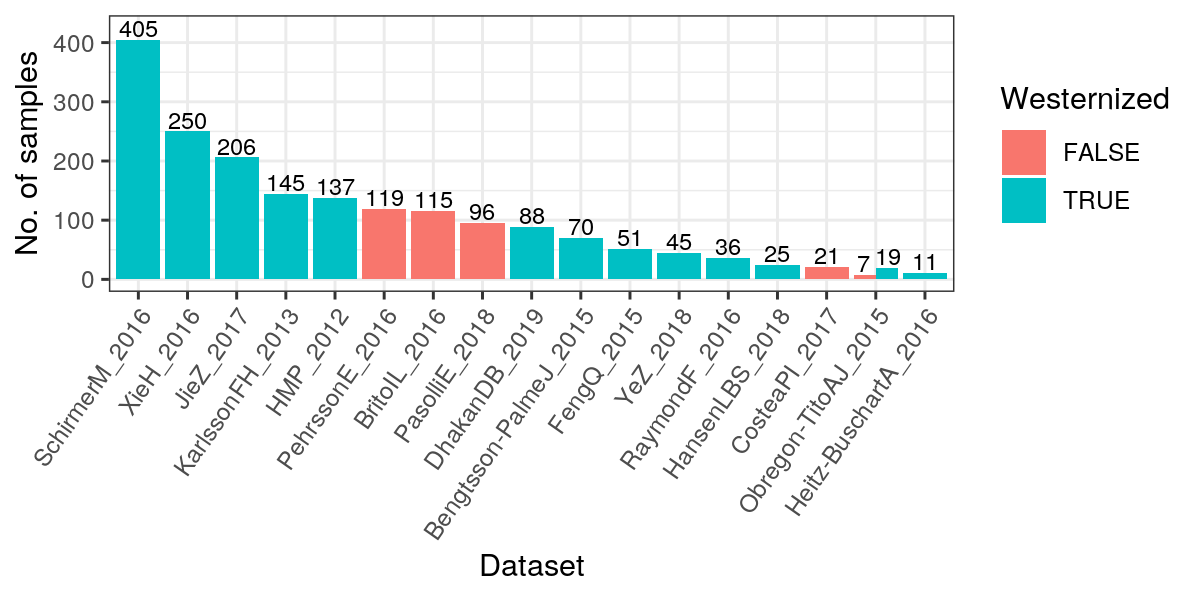

In [41]:
# samples per dataset
p = samples_f_s %>%
    dt_count(by=list(dataset, non_westernized)) %>%
    dt_mutate(dataset = dataset %>% reorder(-N),
              Westernized = non_westernized == 'no') %>%
    ggplot(aes(dataset, N, fill=Westernized)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=N, y=N+20), size=3, 
              position = position_dodge(width = 1)) +
    labs(x='Dataset', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,3)
plot(p)

In [42]:
# body site
samples_f_s %>% dt_pull(body_site) %>% table

.
stool 
 1846 

In [43]:
# condition
samples_f_s %>% dt_pull(study_condition) %>% table

.
   ACVD control     IGT     T2D 
     92    1652      49      53 

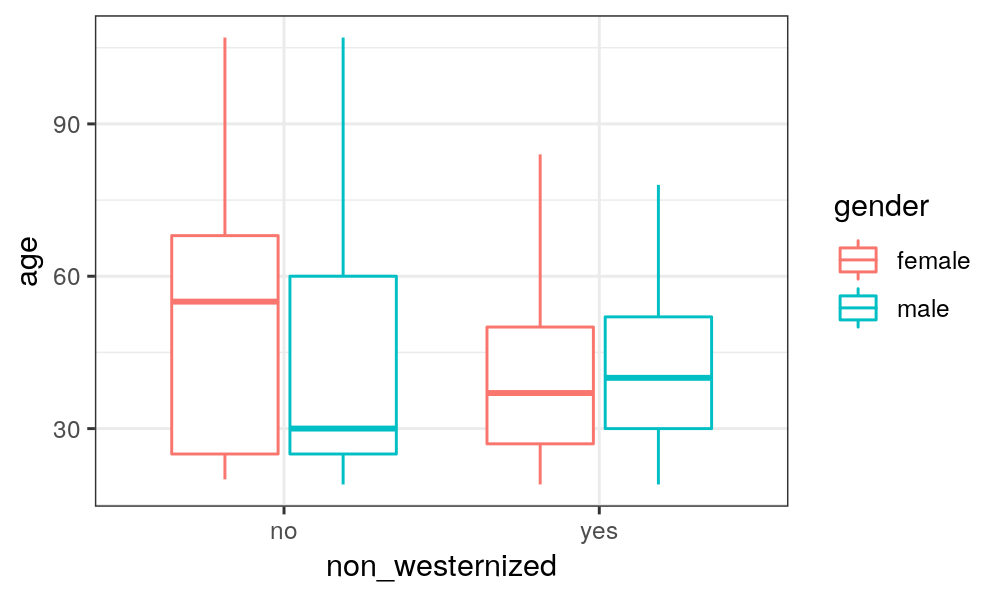

In [44]:
p = samples_f_s %>%
    ggplot(aes(non_westernized, age, color=gender)) +
    geom_boxplot() +
    theme_bw()

p.dims(5,3)
plot(p)

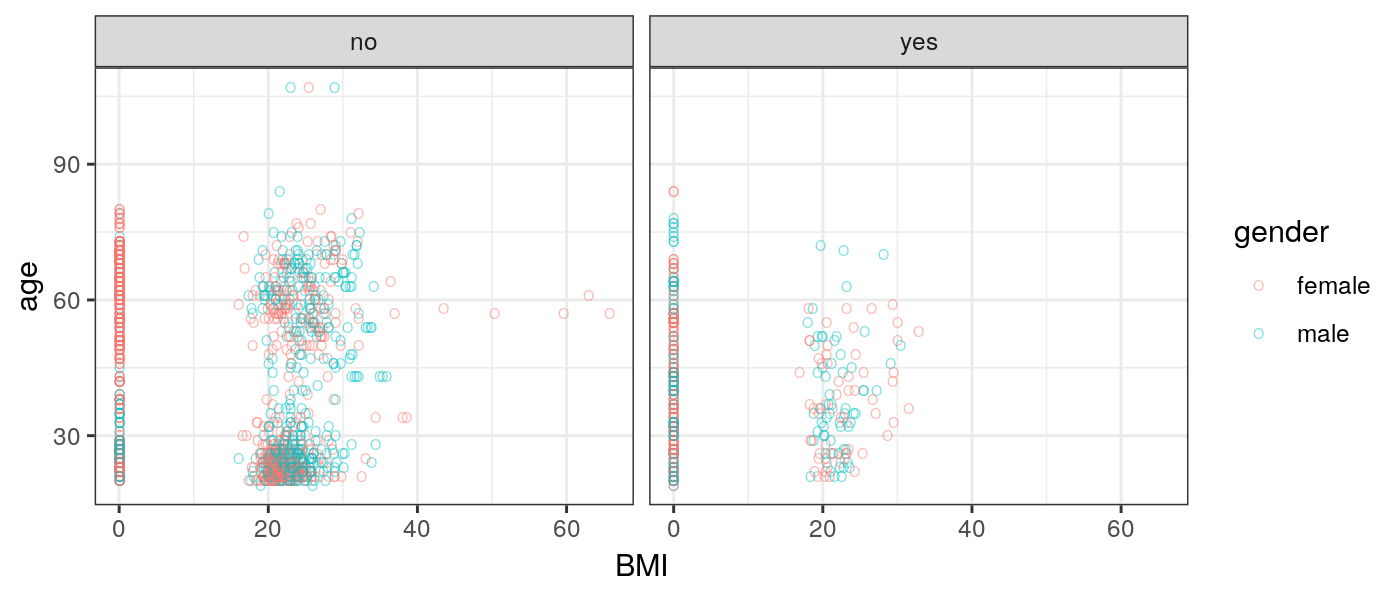

In [45]:
p = samples_f_s %>%
    mutate(BMI = BMI %>% as.Num,
           BMI = ifelse(is.na(BMI), 0, BMI)) %>%
    ggplot(aes(BMI, age, color=gender)) +
    geom_point(shape='O', alpha=0.5) +
    theme_bw() +
    facet_wrap(~ non_westernized)

p.dims(7,3)
plot(p)

## Formatting

In [46]:
samples_f = samples_f %>%
    dt_mutate(westernized = non_westernized == 'no') %>%
    dt_select(-non_westernized)
samples_f

dataset,Sample,Run,Lane,Remote,subjectID,body_site,antibiotics_current_use,study_condition,disease,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
Bengtsson-PalmeJ_2015,TRAVELRES1,1,1,ERR636349,TRAVELRES1_2,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
Bengtsson-PalmeJ_2015,TRAVELRES10,1,1,ERR636358,TRAVELRES9_10,stool,no,control,healthy,⋯,NA,NA,LKA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N-38,1,1,SRR8675918,YEZ_N-38,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
YeZ_2018,YEZ_N-37,1,1,SRR8675921,YEZ_N-37,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


# Writing tables

In [47]:
# checking overlap
overlap(meta, samples_f, sampleID, Sample)

intersect(x,y): 1846 
setdiff(x,y): 1748 
setdiff(y,x): 0 
union(x,y): 3594 


## All metadata

In [48]:
metadata_out_file = file.path(base_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_f.tsv')
meta %>%
    dt_mutate(westernized = non_westernized == 'no') %>%
    dt_select(-non_westernized) %>%
    dt_rename('Sample'=sampleID) %>%
    write_table(metadata_out_file)


File written: /ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval//CurMetDat-metagenomes/files/metadata/Filtered_CurMetDat_f.tsv 


## Filtered metadata

In [49]:
outF = file.path(out_dir, 'CurMetDat_metadata_filt-n1846.tsv')
write_table(samples_f, file=outF)

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//CurMetDat_metadata_filt-n1846.tsv 


# sessionInfo

In [55]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.3 tidytable_0.3.2   data.table_1.12.8 ggplot2_3.2.1    
[5] tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       pillar_1.4.3     compiler_3.6.2   base64enc_0.1-3 
 [5] tools_3.6.2      zeallot_0.1.0    digest_0.6